
# Ground station observations (X_station)

This notebook will help you explore the ground station observations. Hundreds of observation stations are built throughout the French territory and fitted with several weather sensors (temperature, wind...). 
Each parameter is measured every 1 hour and each file contains data for the geographical area 'NW' for North-West of France.  

For more information about data, cf [documentation](https://meteofrance.github.io/meteonet/english/data/ground-observations/).

## Data overview

### Metadata parameters

* **number_sta** : ground station number

The date parameter is a datetime object with the format 'YYYY-MM-DD HH:mm:ss'.

### Meteorological parameters

* **dd** : wind direction in degrees

* **ff** : wind speed in m.s<sup>-1</sup>

* **precip** : precipitation during the reporting period in kg.m<sup>2</sup>

* **hu** : humidity in %

* **td** : dew point temperature** in Kelvin

* **t** : temperature in Kelvin

** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

# Note

<font size="4.5">To use <span style="color:blue">**Cartopy**</span>, a library to plot data with basemaps (see cells below), it is necessary to <span style="color:red">activate the internet connection</span> of that notebook (in edit mode, you can find on the right column, in the *Settings* section, a row entitled *Internet*, put the slider bar on **on**).  </font>

<font size="4.5">If it does not still work, check you use the latest environment (in the *Settings* section, click on **Preferences**). </font>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#open the file with station coordinates (latitude/longitude)

coords_fname  = './../data/Other/Other/stations_coordinates.csv'
coords = pd.read_csv(coords_fname)
display(coords)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


In [15]:
param = 'hu'
fname = './../data/Train/Train/X_station_train.csv'
df = pd.read_csv(fname,parse_dates=['date'],infer_datetime_format=True)

Let's have a look at the dataframe !

In [16]:
display(df.head())
display(df.tail())

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4


,number_sta,date,ff,t,td,hu,dd,precip,Id
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22
4409473,95690001,2017-12-30 23:00:00,9.11,285.92,282.42,79.4,221.0,0.0,95690001_729_23


## Plot a parameter for a given date 

Let's start by selecting a date and time and displaying a subpart of the dataframe.

In [17]:
date = '2017-01-01T06:00:00'
d_sub = df[df['date'] == date]

display(d_sub.head())
display(d_sub.tail())

,number_sta,date,ff,t,td,hu,dd,precip,Id
2212790,14066001,2017-01-01 06:00:00,4.85,274.27,273.75,96.4,193.0,0.0,14066001_366_6
2212814,14126001,2017-01-01 06:00:00,NaN,271.45,271.35,99.0,NaN,0.0,14126001_366_6
2212838,14137001,2017-01-01 06:00:00,4.10,273.68,273.45,98.4,195.0,0.0,14137001_366_6
2212862,14216001,2017-01-01 06:00:00,2.84,271.41,271.01,97.0,207.0,0.0,14216001_366_6
2212886,14296001,2017-01-01 06:00:00,NaN,272.00,NaN,NaN,NaN,0.0,14296001_366_6


,number_sta,date,ff,t,td,hu,dd,precip,Id
2218814,86137003,2017-01-01 06:00:00,0.0,270.94,270.66,98.1,0.0,0.0,86137003_366_6
2218838,86165005,2017-01-01 06:00:00,NaN,273.62,273.62,100.0,NaN,0.0,86165005_366_6
2218862,86272002,2017-01-01 06:00:00,NaN,271.90,NaN,NaN,NaN,0.0,86272002_366_6
2218886,91200002,2017-01-01 06:00:00,NaN,268.61,268.21,97.0,NaN,0.0,91200002_366_6
2218910,95690001,2017-01-01 06:00:00,NaN,268.65,267.95,95.0,NaN,0.0,95690001_366_6


In [18]:
#get the station coordinates for the selected date
d_sub = d_sub.merge(coords, on=['number_sta'], how='left')
d_sub

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta
0,14066001,2017-01-01 06:00:00,4.85,274.27,273.75,96.4,193.0,0.0,14066001_366_6,49.334,-0.431,2.0
1,14126001,2017-01-01 06:00:00,NaN,271.45,271.35,99.0,NaN,0.0,14126001_366_6,49.145,0.042,125.0
2,14137001,2017-01-01 06:00:00,4.10,273.68,273.45,98.4,195.0,0.0,14137001_366_6,49.180,-0.456,67.0
3,14216001,2017-01-01 06:00:00,2.84,271.41,271.01,97.0,207.0,0.0,14216001_366_6,48.928,-0.149,155.0
4,14296001,2017-01-01 06:00:00,NaN,272.00,NaN,NaN,NaN,0.0,14296001_366_6,48.795,-1.037,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...
251,86137003,2017-01-01 06:00:00,0.00,270.94,270.66,98.1,0.0,0.0,86137003_366_6,47.035,0.098,96.0
252,86165005,2017-01-01 06:00:00,NaN,273.62,273.62,100.0,NaN,0.0,86165005_366_6,46.412,0.841,153.0
253,86272002,2017-01-01 06:00:00,NaN,271.90,NaN,NaN,NaN,0.0,86272002_366_6,46.839,0.457,120.0
254,91200002,2017-01-01 06:00:00,NaN,268.61,268.21,97.0,NaN,0.0,91200002_366_6,48.526,1.993,116.0


Now, let's plot the data !

### Simple scatter plot

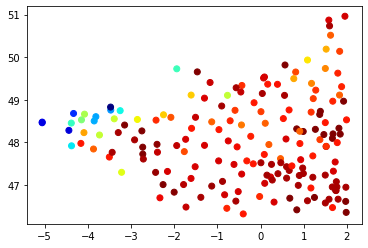

In [19]:
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')
plt.show()

### Plot with Cartopy

In [20]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

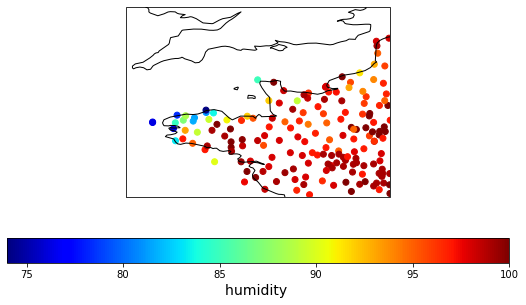

In [21]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig = plt.figure(figsize=(9,5))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')  # Plot

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
plt.colorbar( orientation= 'horizontal').set_label('humidity ',fontsize=14)
# Adjust the plot to the area we defined 
#/!\# this line causes a bug of the kaggle notebook and clears all the memory. That is why this line is commented and so
# the plot is not completely adjusted to the data
# Show only the area we defined
ax.set_extent(extent)

plt.show()